In [17]:
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import rasterio
import numpy as np


raster_path = "dem_250m/dem_250m"

src = rasterio.open(raster_path)
dem = src.read(1).astype(float)

dem[dem == src.nodata] = 0
exaggeration = 1.5

terrain = np.where(dem > 0, dem * exaggeration, 0)
#terrain_north_up = np.flipud(terrain)

TypeError: 'NoneType' object is not callable

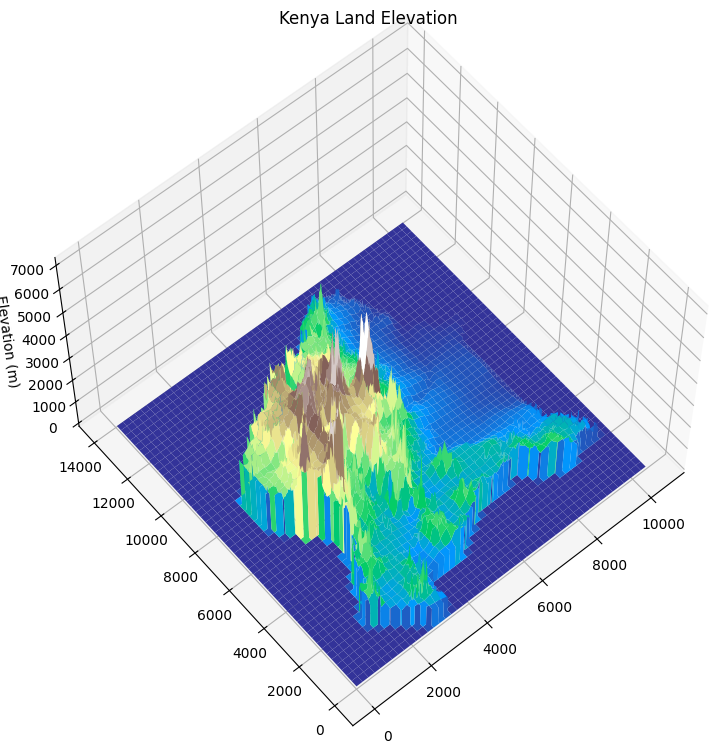

In [22]:
x = np.arange(0, terrain.shape[1])
y = np.arange(0, terrain.shape[0])
X, Y  = np.meshgrid(x, y)

fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(
    X, Y, terrain,
    cmap="terrain",
    linewidth=0,
    antialiased=True,
    shade=True
)
def rotate(angle):
    ax.view_init(elev=angle, azim=230)
anim = animation.FuncAnimation(fig, rotate(60), frames=range(90, -1,-1), interval=80)


ax.set_title("Kenya Land Elevation ")
ax.set_zlabel("Elevation (m)")
plt.savefig("Kenya land terrain.png")
plt.show()